In [1]:
%pylab inline

import pres_style, os
from PyTools import binner
from mpl_toolkits.axes_grid1 import make_axes_locatable

Populating the interactive namespace from numpy and matplotlib


In [2]:
odir_snr = os.path.expandvars("$master/inputs/tests/Z_migrations_snr/")
odir_rds = os.path.expandvars("$master/inputs/tests/Z_migrations_trim/")

snrs, spec_snr, jpas_snr = [5, 15, 25], [], []
for snr in snrs:
    spec_snr.append(genfromtxt("{}/SPEC_snr{}/dynbas_output.log".format(odir_snr, snr), dtype=None, names=True))
    jpas_snr.append(genfromtxt("{}/JPAS_snr{}/dynbas_output.log".format(odir_snr, snr), dtype=None, names=True))

rdss, spec_rds, jpas_rds = ["0p050", "0p075", "0p100"], [], []
for rds in rdss:
    spec_rds.append(genfromtxt("{}/SPEC_rds{}/dynbas_output.log".format(odir_rds, rds), dtype=None, names=True))
    jpas_rds.append(genfromtxt("{}/JPAS_rds{}/dynbas_output.log".format(odir_rds, rds), dtype=None, names=True))

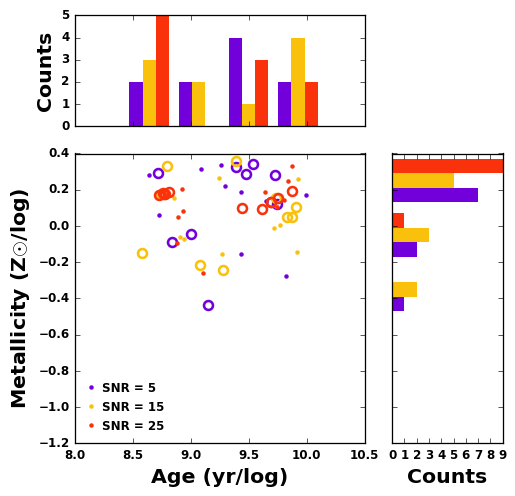

In [24]:
fig, ax1 = subplots()

xl = xlim(8, 10.14)
yl = ylim(-1.1, 0.4)

divider = make_axes_locatable(ax1)
ax2 = divider.append_axes("top", 1.2, pad=0.3, sharex=ax1)
ax3 = divider.append_axes("right", 1.2, pad=0.3, sharey=ax1)
plt.setp(ax2.get_xticklabels() + ax3.get_yticklabels(), visible=False)

ax1.set_xlabel(r"Age (yr/log)")
ax1.set_ylabel(r"Metallicity (Z$\odot$/log)")
ax2.set_ylabel("Counts")
ax3.set_xlabel("Counts")

axs, colors = [ax1, ax2, ax3], "#7200DA #F9C00C #F9320C".split()
age_jpas, met_jpas, age_spec, met_spec = [], [], [], []
age_cons, met_cons = [], []
for i in xrange(len(spec_snr)):
    line, = axs[0].plot(spec_snr[i]["log_t_L_mod"], spec_snr[i]["log_Z_L_mod"], ".", mfc=colors[i], mew=0, ms=7,
                        label="SNR = {}".format(snrs[i]))
    axs[0].plot(jpas_snr[i]["log_t_L_mod"], jpas_snr[i]["log_Z_L_mod"], "o", mew=2, ms=7, mfc="none", mec=colors[i])
    
    age_jpas.append(jpas_snr[i]["log_t_L_mod"])
    met_jpas.append(jpas_snr[i]["log_Z_L_mod"])
    age_spec.append(spec_snr[i]["log_t_L_mod"])
    met_spec.append(spec_snr[i]["log_Z_L_mod"])
    age_cons.append(age_jpas[-1]-age_spec[-1])
    met_cons.append(met_jpas[-1]-met_spec[-1])

axs[1].hist(age_jpas, 5, range=xl, color=colors)
axs[2].hist(met_jpas, 5, range=yl, color=colors, orientation="horizontal")

axs[0].legend(loc=0)

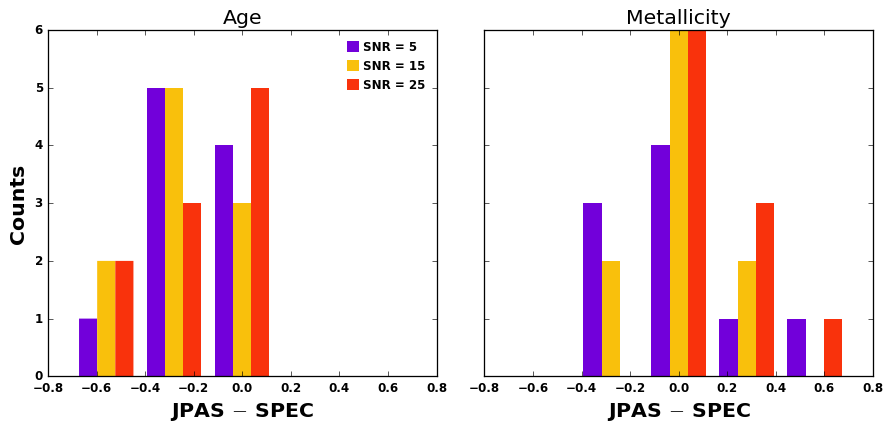

In [33]:
fig, (ax1, ax2) = subplots(1, 2, sharey=True, figsize=(10, 5))

ax1.set_xlabel(r"JPAS $-$ SPEC")
ax1.set_ylabel("Counts")
ax2.set_xlabel(r"JPAS $-$ SPEC")

ax1.set_title("Age")
ax1.hist(age_cons, 5, range=(-0.7,0.7), color=colors, label=["SNR = {}".format(snr) for snr in snrs])
ax2.set_title("Metallicity")
ax2.hist(met_cons, 5, range=(-0.7,0.7), color=colors)

ax1.legend()

fig.tight_layout()

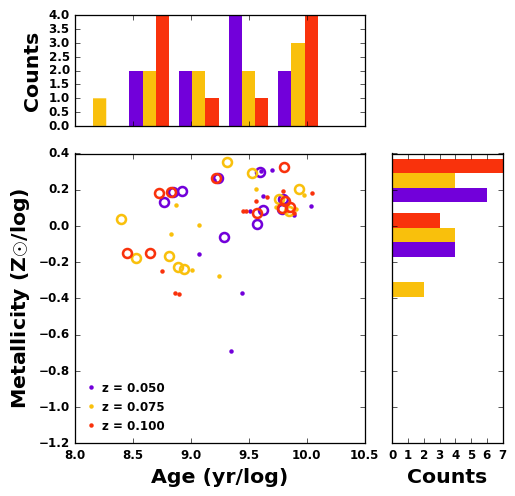

In [29]:
fig, ax1 = subplots()

xl = xlim(8, 10.14)
yl = ylim(-1.1, 0.4)

divider = make_axes_locatable(ax1)
ax2 = divider.append_axes("top", 1.2, pad=0.3, sharex=ax1)
ax3 = divider.append_axes("right", 1.2, pad=0.3, sharey=ax1)
plt.setp(ax2.get_xticklabels() + ax3.get_yticklabels(), visible=False)

ax1.set_xlabel(r"Age (yr/log)")
ax1.set_ylabel(r"Metallicity (Z$\odot$/log)")
ax2.set_ylabel("Counts")
ax3.set_xlabel("Counts")

axs, colors = [ax1, ax2, ax3], "#7200DA #F9C00C #F9320C".split()
age_jpas, met_jpas, age_spec, met_spec = [], [], [], []
age_cons, met_cons = [], []
for i in xrange(len(spec_rds)):
    line, = axs[0].plot(spec_rds[i]["log_t_L_mod"], spec_rds[i]["log_Z_L_mod"], ".", mfc=colors[i], mew=0, ms=7,
                        label="z = {}".format(rdss[i].replace("p", ".")))
    axs[0].plot(jpas_rds[i]["log_t_L_mod"], jpas_rds[i]["log_Z_L_mod"], "o", mew=2, ms=7, mfc="none", mec=colors[i])
    
    age_jpas.append(jpas_rds[i]["log_t_L_mod"])
    met_jpas.append(jpas_rds[i]["log_Z_L_mod"])
    age_spec.append(spec_rds[i]["log_t_L_mod"])
    met_spec.append(spec_rds[i]["log_Z_L_mod"])
    age_cons.append(age_jpas[-1]-age_spec[-1])
    met_cons.append(met_jpas[-1]-met_spec[-1])

axs[1].hist(age_jpas, 5, range=xl, color=colors)
axs[2].hist(met_jpas, 5, range=yl, color=colors, orientation="horizontal")

axs[0].legend(loc=0)

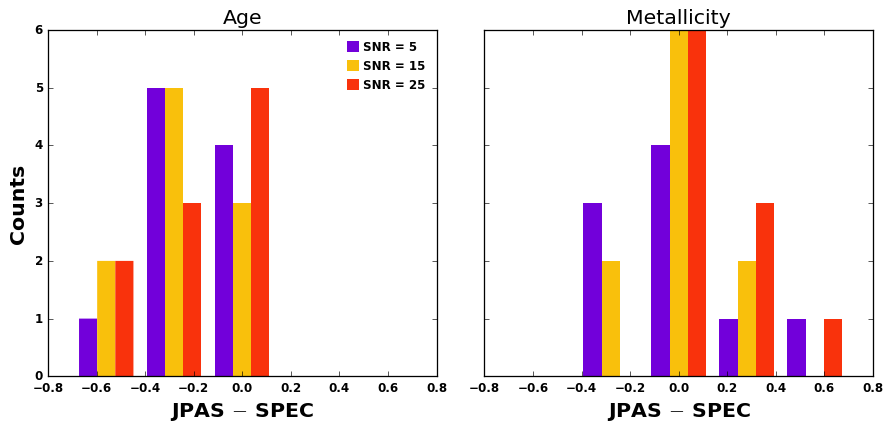

In [32]:
fig, (ax1, ax2) = subplots(1, 2, sharey=True, figsize=(10, 5))

ax1.set_xlabel(r"JPAS $-$ SPEC")
ax1.set_ylabel("Counts")
ax2.set_xlabel(r"JPAS $-$ SPEC")

ax1.set_title("Age")
ax1.hist(age_cons, 5, range=(-0.7,0.7), color=colors, label=["SNR = {}".format(snr) for snr in snrs])
ax2.set_title("Metallicity")
ax2.hist(met_cons, 5, range=(-0.7,0.7), color=colors)

ax1.legend()

fig.tight_layout()